# COSC 311 Final Exam

Monday, May 22, 2023, 10:45 a.m.- 1:15 p.m.

To finish this exam, please download the Jupyter Notebook file and datasets from the exam instructions. You have 150 minutes to finish.

This is an open-book exam. You may use the lecture notes, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: You need to **copy and paste your source code in the Answer Area after each question on MyClasses**. In addition, you also need to **upload this Jupyter Notebook file (".ipynb") with all your source code and test results** to the last task of this exam on MyClasses.

### Question 1 (25 points):

Use the attached Science News paper ("ScienceNews.txt"), write a Python program to analyze this paper and answer the following questions.

Task 1: How many different words appeared in this paper?

Task 2: What are the 5 words that appear most frequently (from high to low)?

Task 3: What are the appearance frequencies for the following words?
- sharks
- ocean
- body
- water

Task 4: Draw a bar figure to show the average length of words for each appearance frequency.

Note: you may use **file = open('ScienceNews.txt', 'r', errors='ignore')** to open the file if there is encoding/decoding error.

Number of different words: 363
Most common 5 words: [('the', 53), ('to', 19), ('of', 17), ('and', 16), ('sharks', 15)]
The following word frequencies are: {'sharks': 15, 'ocean': 2, 'body': 7, 'water': 2}


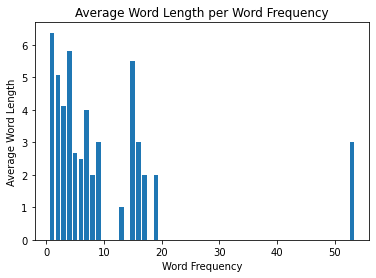

In [56]:
import collections
import matplotlib.pyplot as plt

# Open and read the file
with open('ScienceNews.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', ' ')

# Split the text into words and convert them to lowercase
words = data.lower().split()

# Task 1: How many different words appeared in this paper?
word_set = set(words)
print("Number of different words:", len(word_set))

# Task 2: What are the 5 words that appear most frequently (from high to low)?
word_counter = collections.Counter(words)
common_words = word_counter.most_common(5)
print("Most common 5 words:", common_words)

# Task 3: What are the appearance frequencies for the following words?
words_look = ['sharks', 'ocean', 'body', 'water']
word_freq = {word: word_counter[word] for word in words_look}
print("The following word frequencies are:", word_freq)

# Task 4: Draw a bar figure to show the average length of words for each appearance frequency.
freq_word_l = collections.defaultdict(list)
for word, freq in word_counter.items():
    freq_word_l[freq].append(len(word))

avg_len_p = {freq: sum(lengths) / len(lengths) for freq, lengths in freq_word_len_dict.items()}

# Plotting in bar graph
plt.bar(avg_len_p.keys(), avg_len_p.values())
plt.xlabel('Word Frequency')
plt.ylabel('Average Word Length')
plt.title('Average Word Length per Word Frequency')
plt.show()

### Question 2 (25 pints):

Please use the "Housing Dataset" attached to finish the following tasks. **Each figure needs to show title, xlabel, and ylabel**.

Task 1: Draw a scatterplot figure to show the relationship between "median_income" and "total_bedrooms";

Task 2: Draw a bar figure to show the **average** "median_house_value" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

Task 3: Draw a histogram to show the "total_rooms" distribution in 5 bins for the "NEAR OCEAN" houses

Task 4: Draw a bar figure to show the **maximum** "households" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

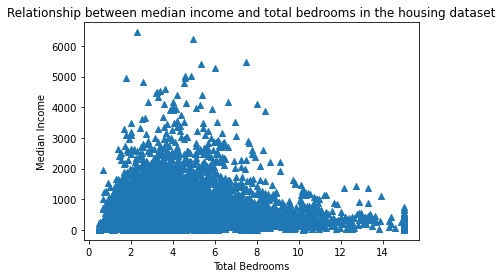

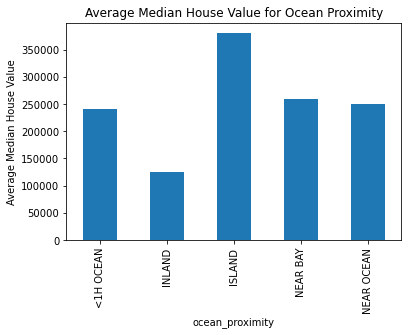

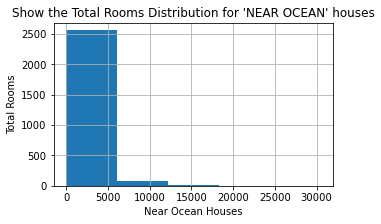

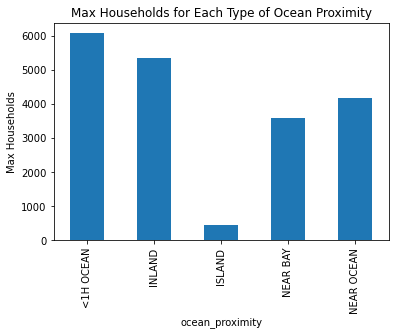

In [46]:
import pandas as pd
import numpy as np  # Just in case, but also comes along with pandas
from matplotlib import pyplot as plt # For plotting

# Read in the data
Housing = pd.read_csv('housing.csv')

# Task 1: Draw a scatterplot figure to show the relationship between "median_income" and "total_bedrooms"
plt.scatter(Housing['median_income'], Housing['total_bedrooms'], marker='^')
plt.title('Relationship between median income and total bedrooms in the housing dataset')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median Income')
plt.show();

# Task 2: Draw a bar figure to show the average "median_house_value" for each type of "ocean_proximity" 
AvgMedVal = Housing.groupby('ocean_proximity')['median_house_value'].mean()
AvgMedVal.plot.bar()
plt.title("Average Median House Value for Ocean Proximity")
plt.ylabel("Average Median House Value")
plt.show();

# Task 3: Draw a histogram to show the "total_rooms" distribution in 5 bins for the "NEAR OCEAN" houses
Housing['total_rooms'][Housing['ocean_proximity'] == 'NEAR OCEAN'].hist(bins = 5, grid = True, figsize = (5,3))
plt.title("Show the Total Rooms Distribution for 'NEAR OCEAN' houses")
plt.ylabel("Total Rooms")  
plt.xlabel("Near Ocean Houses")
plt.show();

# Task 4: Draw a bar figure to show the maximum "households" for each type of "ocean_proximity"
MaxValHouse = Housing.groupby('ocean_proximity')['households'].max()
MaxValHouse.plot.bar()
plt.title("Max Households for Each Type of Ocean Proximity")
plt.ylabel("Max Households")
plt.show();

### Question 3 (25 points):

Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. 

Task 1: Randomly split this dataset into two parts: 70% for training and 30% for testing. 

Task 2: Use KNN classification algorithm to conduct experiments and find out the most appropriate parameter for *k (1 <= k <= 15)* that obtains the highest testing accuracy. You need to draw a figure to show the accuracies for different values of *k*;

Task 3: Use the split dataset in Task 1 and the best *k* value selected in Task 2, conduct independent test, then show the results using **Classification Report** and draw the confusion matrix (in a figure);  

Task 4: Use the WHOLE dataset and the best *k* value selected in Task 2, conduct a 5-fold cross validation test and show the average accuracy. 

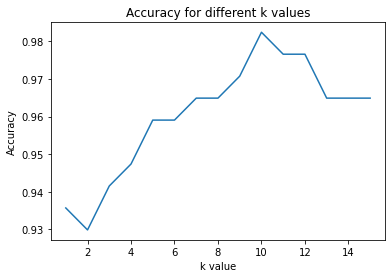

The most appropriate k value is: 10
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



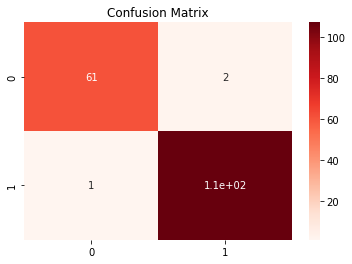

Cross Validation Score:
Average accuracy: 0.9314702685918336


In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Task 1: Randomly split the dataset: 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 2: Find the most appropriate k value that has the highest testing accuracy
# Loop through using for look from 1-15
k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

# Plot the accuracies for different k values
plt.plot(k_values, accuracies)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values')
plt.show()

# Selects the best k
top_k = k_values[np.argmax(accuracies)]
print(f"The most appropriate k value is: {top_k}")

# Task 3: Use the best k value to predict on test set and show Classification Report and  draw 
# the confusion matrix
knn = KNeighborsClassifier(n_neighbors= top_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap= 'Reds')
plt.title('Confusion Matrix')
plt.show()

# Task 4: 5-fold cross validation on the whole dataset
knn = KNeighborsClassifier(n_neighbors=best_k)
scores = cross_val_score(knn, X, y, cv=5)
print("Cross Validation Score:")
print(f"Average accuracy: {np.mean(scores)}")

### Question 4 (25 points):

Please use the UCI ML hand-written digits dataset in our lecture note "COSC311_Module5_4_Kmeans clustering", which is included in the scikit-learn library.

Task 1: Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 85% variance (i.e. the ratio of variance loss, η, is less than 15%).

Task 2: Assume *m* principal components are needed to keep at least 85% variance, transform the dataset from 64 dimensions to *m* dimensions.

Task 3: Based on the above dimension-reduced dataset, conduct k-means clustering (*k* = 10, each cluster is a digit), output the center of each cluster.

Task 4: Match each learned cluster label with the true label (i.e. ground truth) using **mode** function in **scipy.stats** package (i.e. based on most common value), calculate and output the clustering accuracy, and show the corresponding confusion matrix as a figure.

The Clustering Accuracy is:  0.7941012799109627


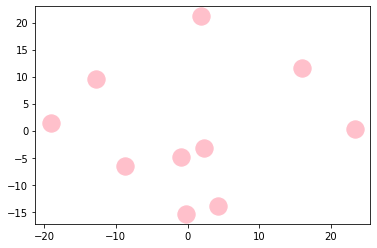

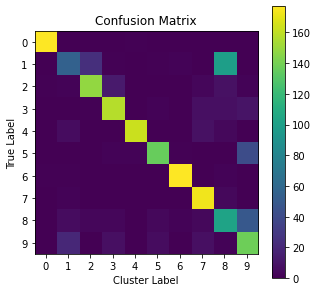

In [96]:
# Import the required libraries
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
 
# Load the dataset
digits = load_digits()
X = digits.data

# Task 1: Conduct PCA analysis on the dataset
pca = PCA()
X_pca = pca.fit_transform(X)
 
# At least 85% variance 
cumulative_v_r = np.cumsum(pca.explained_variance_ratio_)
m = np.argmax(cumulative_v_r >= 0.85) + 1 
 
# Task 2: Transform the dataset from 64 dimensions to m dimensions
pca_m = PCA(n_components=m)
X_pca_m = pca_m.fit_transform(X)

# Task 3: Conduct k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_pca_m)

# Calculate and print a visual of the centers of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=300);

# Task 4: Match each learned cluster label with the true label
labels = np.zeros_like(clusters)
for i in range(10):
    z = (clusters == i)
    labels[z] = mode(digits.target[z])[0]

accuracy = accuracy_score(digits.target, labels)
print("The Clustering Accuracy is: ", accuracy)
 
# Show the confusion matrix
matrix = confusion_matrix(digits.target, labels)
plt.figure(figsize=(5, 5))
plt.imshow(matrix)
plt.title('Confusion Matrix')
plt.colorbar() # You can have a key to interp

tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True Label')
plt.xlabel('Cluster Label')
plt.show()